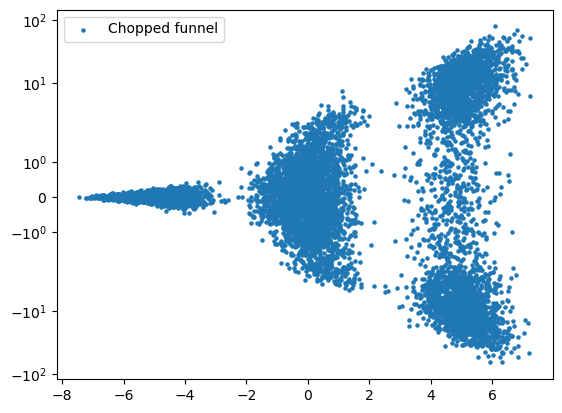

In [1]:
from potentials.synthetic.multimodal_conditionals import ChoppedFunnel
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)
chopped_funnel = ChoppedFunnel(2)
with torch.no_grad():
    x = chopped_funnel.sample(batch_shape=(10000,))

plt.figure()
plt.scatter(x[..., 0], x[..., 1], label='Chopped funnel', s=5)
plt.legend()
# plt.xscale("symlog")
plt.yscale("symlog")
plt.show()